# Test 43: The $\chi^2$ test for consistency in a 2 × K table

## Objective

- You have an $2 \times K$ table
- Each row is a sample
- Each column is a category
- Are your 2 samples from the same population?

## Assumptions

- The 2 observations are sufficiently large
- $K$ classes describe the observations completely

## Method

- You have a $2 \times K$ table
- Each row is 1 sample, and each column is 1 category
- Each sample has multiple observations, and the value $n_{ij}$ in each cell represents the frequency of observations in the $i$-th sample for the $j$-th class

| | Class 1 | ... | Class K | Total | 
| - | - | - | - | - |
| Sample 1 | $n_{11}$ | ... | $n_{1k}$ | $N_1$ |
| Sample 2 | $n_{21}$ | ... | $n_{2k}$ | $N_2$ |
| Total | $n_{.1}$ | ... | $n_{.k}$ | $N_1 + N_2$ |

- Define a new statistic called $e_{ij}$, which is the "expected frequency" for each cell
$$\begin{aligned}
    e_{ij} &= \frac{N_i n_{.j}}{N_1 + N_2}
\end{aligned}$$

- The test statistic is:
$$\begin{aligned}
    \chi^2 &= \sum_{i=1}^{2} \sum_{j=1}^{K} \frac{(n_{ij} - e_{ij})^2}{e_{ij}}
\end{aligned}$$

- This follows a $\chi^2$ distirbution with $K-1$ degrees of freedom

## Proof

In [4]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [15]:
K = 5
N = 2
NSAMPLES = 500

def get_test_statistic():
    sample1 = dict(Counter(
        np.array([
            np.random.choice(range(K))
            for _ in range(NSAMPLES)
        ])
    ))

    sample2 = dict(Counter(
        np.array([
            np.random.choice(range(K))
            for _ in range(NSAMPLES)
        ])
    ))

    contingency_table = np.concatenate(
        (np.array([sample1.get(i) for i in range(K)]),
        np.array([sample2.get(i) for i in range(K)]))
    ).reshape(N,K)

    col_sum = np.sum(contingency_table, 0).reshape(K)
    row_sum = np.sum(contingency_table, 1).reshape(N)

    eij = np.array([
        (row_sum[i] * col_sum[j])/(np.sum(row_sum))
        for i in range(N)
        for j in range(K)    
    ]).reshape(N, K)

    test_statistic = (
        np.sum([
            (((contingency_table[i][j] - eij[i][j])**2) / eij[i][j]) 
            for i in range(N) 
            for j in range(K)
        ])
    )

    return test_statistic

# get_test_statistic()

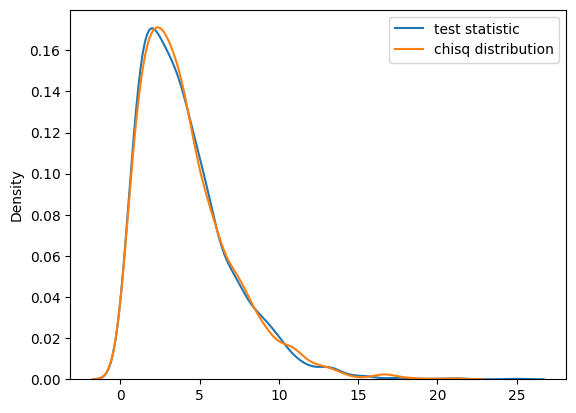

In [16]:
test_statistic_distribution = [get_test_statistic() for _ in range(3_000)]
true_chisq_distribution = np.random.chisquare(K-1, 3_000)

sns.kdeplot(test_statistic_distribution, label='test statistic')
sns.kdeplot(true_chisq_distribution, label='chisq distribution')
plt.legend()